In [2]:
library('purrr')
library('tidyverse')

theme_set(theme_gray(base_size = 16))

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [3]:
# Difference between 140 (observed) and 125 (expected for a fair coin)

observed = 140 # number of heads
expected = 125 # fair coin

test_statistic = abs(observed - expected)
test_statistic
     

[1] 15

In [5]:
toss = function(sample_size) {
    n_heads = sum(runif(sample_size) < 0.5)
    return(n_heads)
}

In [6]:

simulate = function(sample_size, n_samples) {
    n_heads = map_vec(1:n_samples, ~ toss(sample_size))
    return(n_heads)
}
  

In [7]:
n_heads = simulate(sample_size = 250, n_samples = 10000)

outcomes_df = tibble(n_heads = n_heads)

outcomes_df |> head()

n_heads
<int>
131
114
125
124
137
124


In [13]:
outcomes_df |> range()

[1]  97 156

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


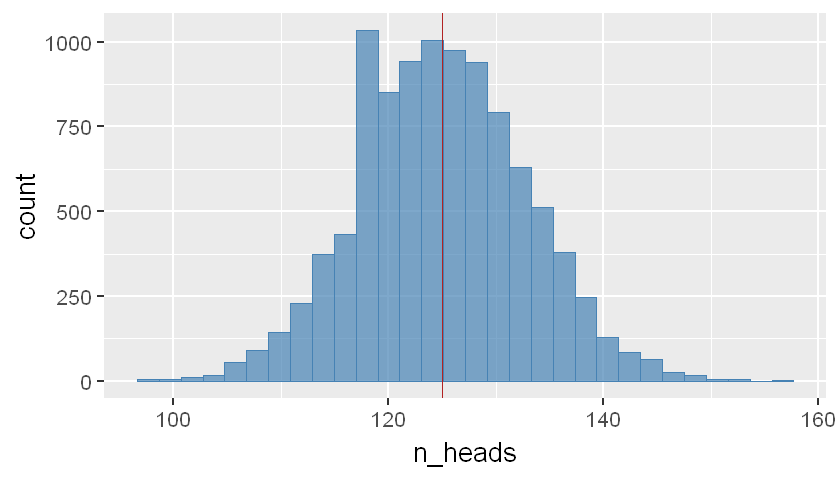

In [8]:
options(repr.plot.width = 7, repr.plot.height = 4)

p = ggplot(outcomes_df, aes(x = n_heads)) +
    geom_histogram(color = 'steelblue', fill = 'steelblue', alpha = 0.7) +
    geom_vline(xintercept = 125, color = 'firebrick')

p
     

In [10]:
test_statistic_simulated = abs(n_heads - expected)

test_statistic_simulated[1:5]

[1]  6 11  0  1 12

In [11]:
# calculate p-value
sum(test_statistic_simulated >= test_statistic) / length(test_statistic_simulated)

[1] 0.0656

In [14]:
(test_statistic_simulated >= test_statistic) |> mean()

[1] 0.0656

Workflow for hypthesis testing:

1. Calculate test statistic from actual data
2. Simulate data under the null model
3. Calculcate test statistic values from simulated data
4. Count how often simulated test statistic values exceed actual test statistic